# Omrežja

## Knjižica `networkx`

Simple handling of graph data in Python.

In [1]:
import networkx as nx

### Gradnja grafa

Create a simple graph.

In [2]:
G = nx.Graph()    # Undirected
# G = nx.DiGraph()  # Directed

G.add_node("Ana")
G.add_nodes_from(["Bojan", "Cene", "Danica"])

G.add_edge("Ana", "Bojan")
G.add_edge("Ana", "Cene")
G.add_edge("Ana", "Danica")
G.add_edge("Bojan", "Danica")


In [3]:
G.nodes

NodeView(('Ana', 'Bojan', 'Cene', 'Danica'))

In [4]:
G.edges

EdgeView([('Ana', 'Bojan'), ('Ana', 'Cene'), ('Ana', 'Danica'), ('Bojan', 'Danica')])

Write the graph into a file.

In [5]:
nx.write_pajek(G, 'podatki/mreza-primer.net')

Read the `.net` file in a Graph structure. 

In [6]:
G = nx.read_pajek('podatki/mreza-primer.net')

### Prikaz grafa

Draw the graph structure using `matplotlib`.

For more options, see <a href="https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx">the documentation.</a>

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')
import numpy as np

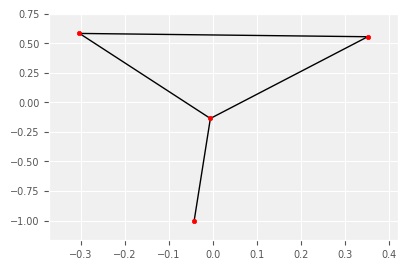

In [8]:
plt.figure()
nx.draw_networkx(G, with_labels=False, node_size=10)
plt.show()

Compute node sizes proportional to the number of edges for a node. Plot using `draw.networkx(...,node_size=node_size)`

In [9]:
node_size = [50 * len(G.edge[ky]) for ky in G.node]
node_size

AttributeError: 'MultiGraph' object has no attribute 'edge'

### Segmentacija omrežja

Finding strongly connected components inside a network.

First, we load the data. As this is the network of email correspondents for a given address, we remove the central node (why?).

In [10]:
H = nx.read_pajek("addresses.net")
H = nx.Graph(H)

# Remove central node
myself = "b'martin.strazar@gmail.com'"
H.remove_node(myself)

FileNotFoundError: [Errno 2] No such file or directory: 'addresses.net'

Next, we find the k-connected components. A k-components is a connected subgraph, for which we need to remove at least k nodes to break it into more components. Intuitively, subgraphs with  large value of k are harder to break and thus more strongly connected.

In [11]:
from networkx.algorithms import approximation as apxa
k_components = apxa.k_components(H)

k_components


NameError: name 'H' is not defined

Lets look at solutions for a given k and look at the number of nodes on each connected component.

In [12]:
k = 5                   # Subgraphs of connectivity k
sol = k_components[k]   # Multiple solutions of k_components
list(map(len, sol))     # Each component breaks a graph

NameError: name 'k_components' is not defined

For each connected component, assign the black color to its corresponding nodes and white to all other nodes.

In [13]:
colors_groups = list()
for gi, group in enumerate(sol):
    colors_arr = ["red" if (n in group) else "gray" for n in H.node]
    colors_groups.append(colors_arr)

NameError: name 'sol' is not defined

Plot a selected component.

In [14]:
comp_index = 2
plt.figure()
nx.draw_networkx(H, with_labels=False, 
                 node_color=colors_groups[comp_index],)
plt.show()

NameError: name 'H' is not defined